# Testing nilearn carpet plots with atlases

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from nilearn import datasets, image, masking, plotting

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
adhd_dataset = datasets.fetch_adhd(n_subjects=12)
func = adhd_dataset.func[0]

# Print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      func)  # 4D data

First subject functional nifti image (4D) is at: /Users/taylor/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/func.py:458: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


In [3]:
# Build an EPI-based mask because we have no anatomical data
mask_img = masking.compute_epi_mask(func)

/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:2155: UserWarning: 39/62546 bad voxels identified. Dropping.
  warnings.warn(
<ipython-input-4-0874873009a3>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


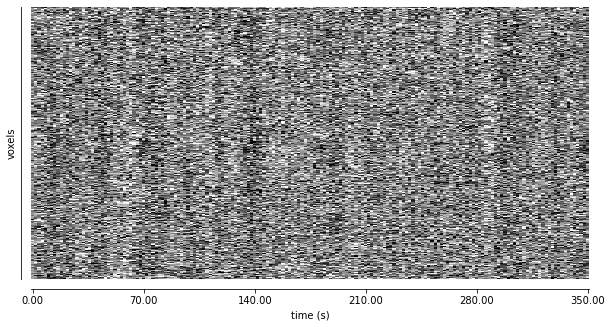

In [4]:
display = plotting.plot_carpet(func, mask_img)
display.show()

<ipython-input-5-f743198620c9>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


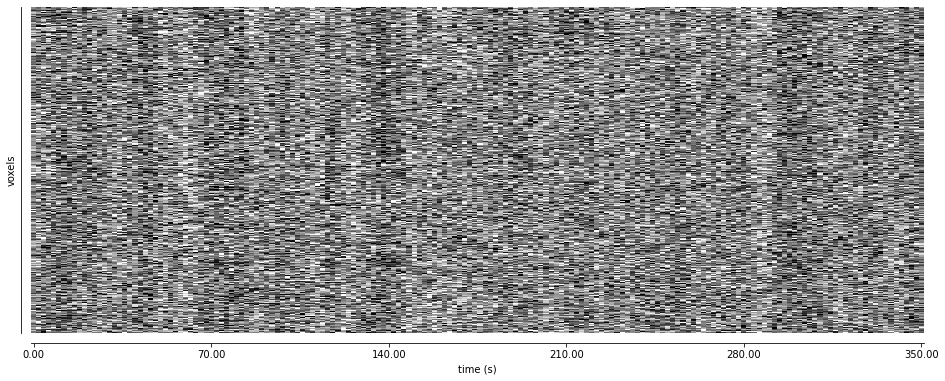

In [5]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = plotting.plot_carpet(func, mask_img, axes=ax)
fig.show()

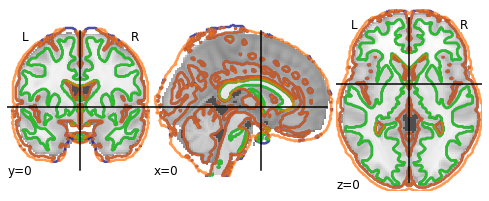

In [6]:
atlas = datasets.fetch_icbm152_2009()
atlas_img = image.concat_imgs((atlas["gm"], atlas["wm"], atlas["csf"]))
map_labels = {"gm": 1, "wm": 2, "csf": 3}

atlas_data = atlas_img.get_fdata()
discrete_version = np.argmax(atlas_data, axis=3) + 1
discrete_version[np.max(atlas_data, axis=3) == 0] = 0
discrete_atlas_img = nib.Nifti1Image(discrete_version, atlas_img.affine, atlas_img.header)
plotting.plot_roi(discrete_atlas_img, view_type="contours")

/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:519: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:2155: UserWarning: 12637/81989 bad voxels identified. Dropping.
  warnings.warn(
<timed exec>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


CPU times: user 4.26 s, sys: 730 ms, total: 4.99 s
Wall time: 3.64 s


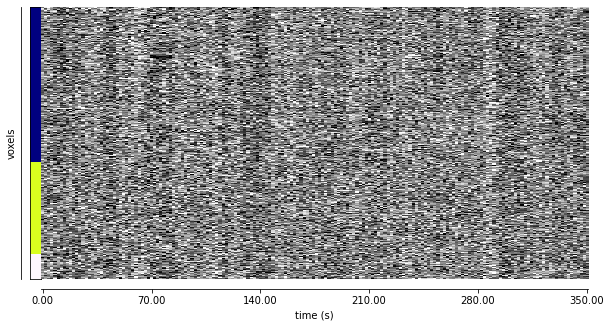

In [7]:
%%time
display = plotting.plot_carpet(func, discrete_atlas_img)
display.show()

/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:519: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


Coercing atlas_values to <class 'int'>


/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:2155: UserWarning: 12637/81989 bad voxels identified. Dropping.
  warnings.warn(
<timed exec>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


CPU times: user 4.2 s, sys: 686 ms, total: 4.89 s
Wall time: 3.49 s


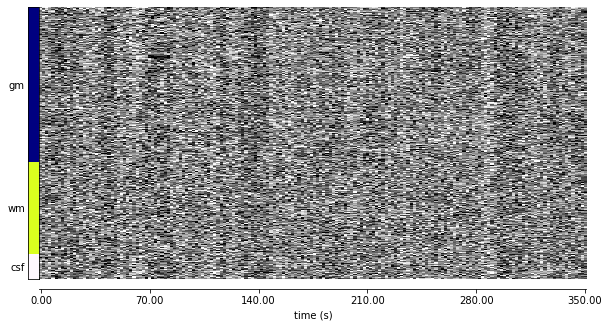

In [8]:
%%time
display0 = plotting.plot_carpet(func, discrete_atlas_img, mask_labels=map_labels)
display0.show()

In [9]:
%%time
display = plotting.plot_carpet(
    func,
    discrete_atlas_img,
    mask_labels=map_labels,
    ordering="hierarchical",
)
display.show()

/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:519: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


Coercing atlas_values to <class 'int'>


/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:2155: UserWarning: 12637/81989 bad voxels identified. Dropping.
  warnings.warn(


Processing 1: 39601 voxels
Processing 2: 23434 voxels


KeyboardInterrupt: 

In [10]:
cbar = display.axes[0].images[0].get_array().data
data = display.axes[1].images[0].get_array().data

In [11]:
gm_idx = np.where(cbar == 1)[0]
wm_idx = np.where(cbar == 2)[0]
csf_idx = np.where(cbar == 3)[0]
gm_data = data[gm_idx, :]
wm_data = data[wm_idx, :]
csf_data = data[csf_idx, :]

In [12]:
print("GM-WM")
print(np.corrcoef(gm_data[-1, :], wm_data[0, :])[0, 1])
print(np.corrcoef(gm_data[0, :], wm_data[0, :])[0, 1])
print(np.corrcoef(gm_data[0, :], wm_data[-1, :])[0, 1])
print(np.corrcoef(gm_data[-1, :], wm_data[-1, :])[0, 1])
print("CSF-WM")
print(np.corrcoef(csf_data[0, :], wm_data[-1, :])[0, 1])
print(np.corrcoef(csf_data[0, :], wm_data[0, :])[0, 1])
print(np.corrcoef(csf_data[-1, :], wm_data[0, :])[0, 1])
print(np.corrcoef(csf_data[-1, :], wm_data[-1, :])[0, 1])

GM-WM
-0.05694755104805025
0.048425811092631985
0.06481928486611889
-0.12103207907913754
CSF-WM
-0.14774944794713432
-0.03726163417428611
0.13001732603980515
0.1703653438115976


In [ ]:
%%time
display = plotting.plot_carpet(
    func,
    mask_img,
    ordering="hierarchical",
)
display.show()

/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:2155: UserWarning: 39/62546 bad voxels identified. Dropping.
  warnings.warn(


Processing 1: 62507 voxels
